In [5]:
pip install tensorflow keras numpy requests scikit-learn matplotlib ConfigSpace

Note: you may need to restart the kernel to use updated packages.


In [1]:
!nvidia-smi

Mon Nov  4 12:09:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060        Off | 00000000:01:00.0 Off |                  N/A |
| 32%   29C    P8              N/A / 115W |     69MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set for GPUs")
    except RuntimeError as e:
        print(e)

Memory growth set for GPUs


# Fashion MNIST CNN

## FASHION MNIST baseline

In [20]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Verify TensorFlow installation and GPU availability
print("TensorFlow version:", tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))

if gpus:
    try:
        # Enable memory growth for each GPU to prevent TensorFlow from allocating all GPU memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print("Error setting memory growth:", e)
else:
    print("No GPU detected. Using CPU.")


# 1. Load the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# 2. Normalize the input data to [0, 1] range
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. Split the full training set into training and validation sets
val_ration = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=val_ration, random_state=42, shuffle=True
)

# 4. Define class names for reference (optional)
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# 5. Print dataset shapes for verification
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# 6. Reshape input data based on the Keras backend
img_rows, img_cols = 28, 28  # Fashion MNIST images are 28x28 pixels


X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# 7. Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10  # There are 10 classes in Fashion MNIST

y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

kernel_initializer='he_normal'

# 8. Define the CNN model
model = Sequential([
    Conv2D(28, kernel_size=(3, 3), activation='relu', input_shape=input_shape, kernel_initializer = kernel_initializer),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer = kernel_initializer),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer = kernel_initializer),
    Dropout(0.5),   
    Dense(num_classes, activation='softmax')  
])

# 9. Compile the model
model.compile(
    loss='categorical_crossentropy',      # Suitable loss function for multi-class classification
    optimizer='adam',                     # Adam optimizer
    metrics=['accuracy']                  # Evaluate performance using accuracy
)

# 10. Train the model
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(X_valid, y_valid)    # Use validation set for monitoring
)

# 11. Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


TensorFlow version: 2.18.0
Num GPUs Available: 1
1 Physical GPUs, 1 Logical GPUs
X_train shape: (54000, 28, 28)
54000 train samples
10000 test samples
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7156 - loss: 0.8518 - val_accuracy: 0.8748 - val_loss: 0.3412
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8610 - loss: 0.3882 - val_accuracy: 0.8927 - val_loss: 0.2800
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8852 - loss: 0.3206 - val_accuracy: 0.9040 - val_loss: 0.2572
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8994 - loss: 0.2767 - val_accuracy: 0.9087 - val_loss: 0.2446
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9071 - loss: 0.2533 - val_accuracy: 0.9095 - val_loss: 0.2412
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9162 - loss: 0.2258 - val_accuracy: 0.9180 - val_loss: 0.2349
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9225 - loss: 0

## Fashion MNIST HPO

In [22]:
pip install ConfigSpace

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ConfigSpace: filename=ConfigSpace-1.2.0-py3-none-any.whl size=115855 sha256=0b4c4e2777de156083e56e93f4409c672c9bd4b8300b23e84fdd1450885b311c
  Stored in directory: /vol/home/s4422090/.cache/pip/wheels/1c/c1/6b/8c7b7a188c6753c0b2e2fca5cfe7dd7d1e2fbb52eed0e54c75
Successfully built ConfigSpace
Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from ConfigSpace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, Constant
from ConfigSpace.util import generate_grid


def train_model(config):
    # Extract hyperparameters from the configuration
    filters = config['filters']
    kernel_size = config['kernel_size']
    activation = config['activation']
    optimizer = config['optimizer']
    batch_size = config['batch_size']
    epochs = config['epochs']
    kernel_initializer = config['kernel_initializer']
    dropout_rate = config['dropout_rate']
    max_pool_size = config['max_pool_size']
    FC_size = config['FC_size']
    
#cs.add_hyperparameters([filters, kernel_size, activation, optimizer, batch_size, epochs, kernel_initializer, dropout_rate, max_pool_size, FC_size])

    # Build the model
    model = Sequential([
        Conv2D(filters, kernel_size=(kernel_size, kernel_size), activation=activation, input_shape=input_shape, kernel_initializer=kernel_initializer),
        Conv2D(filters * 2, kernel_size=(kernel_size, kernel_size), activation=activation, kernel_initializer=kernel_initializer),
        MaxPooling2D(pool_size=(max_pool_size, max_pool_size)),
        Dropout(dropout_rate),

        Flatten(),
        Dense(FC_size, activation=activation, kernel_initializer=kernel_initializer),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    # Train the model (we will use early stopping if desired)
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,  # Set to 1 for detailed logs
        validation_data=(X_valid, y_valid)
    )

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=0)

    return val_accuracy


# Load the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the input data to [0, 1] range
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Split the full training set into training and validation sets
val_ratio = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=val_ratio, random_state=42, shuffle=True
)

# Reshape input data
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)


# Define the hyperparameter space
cs = ConfigurationSpace()

# Hyperparameters
filters = CategoricalHyperparameter('filters', [28, 56])
kernel_size = CategoricalHyperparameter('kernel_size', [3, 5])
kernel_initializer = CategoricalHyperparameter('kernel_initializer', ['random_normal', 'he_normal'])
activation = CategoricalHyperparameter('activation', ['relu', 'sigmoid'])
optimizer = CategoricalHyperparameter('optimizer', ['adam', 'sgd'])
batch_size = Constant('batch_size', 128)
epochs = Constant('epochs', 10)
dropout_rate = CategoricalHyperparameter('dropout_rate', [0.0, 0.25, 0.5])
max_pool_size = CategoricalHyperparameter('max_pool_size', [2,3])
FC_size = CategoricalHyperparameter('FC_size', [128, 256])

# Add hyperparameters to the configuration space
cs.add_hyperparameters([filters, kernel_size, activation, optimizer, batch_size, epochs, kernel_initializer, dropout_rate, max_pool_size, FC_size])

# Generate the grid of configurations
grid = generate_grid(cs)
print(f"Total configurations to evaluate: {len(grid)}")


results = []

for idx, config in enumerate(grid):
    config_dict = config.get_dictionary()
    print(f"Evaluating configuration {idx + 1}/{len(grid)}: {config_dict}")
    val_accuracy = train_model(config_dict)
    print(f"Validation accuracy: {val_accuracy:.4f}\n")

    # Store the results
    results.append({
        'config': config_dict,
        'val_accuracy': val_accuracy
    })



# Sort the results by validation accuracy in descending order
results = sorted(results, key=lambda x: x['val_accuracy'], reverse=True)

# Print the top configurations
print("\nTop Configurations:")
for rank, result in enumerate(results[:5], start=1):
    print(f"Rank {rank}:")
    print(f"Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"Hyperparameters: {result['config']}\n")

/tmp/ipykernel_2233872/3531416474.py:106: DeprecationWarning: Please use `space.add(hyperparameters)`
  cs.add_hyperparameters([filters, kernel_size, activation, optimizer, batch_size, epochs, kernel_initializer, dropout_rate, max_pool_size, FC_size])
/tmp/ipykernel_2233872/3531416474.py:116: DeprecationWarning: Please use `dict(config)` instead of `config.get_dictionary()` or use it as a dictionary directly if needed.
  config_dict = config.get_dictionary()
/vol/home/s4422090/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Total configurations to evaluate: 384
Evaluating configuration 1/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9220

Evaluating configuration 2/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'sgd'}


2024-11-04 13:08:29.720203: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:08:29.894474: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 13:08:29.976657: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 300 bytes spill stores, 276 bytes spill loads

2024-11-04 13:08:34.017436: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:08:34.222880: I external/local_xla/xla/stream_execut

Validation accuracy: 0.8487

Evaluating configuration 3/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9183

Evaluating configuration 4/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'sgd'}


2024-11-04 13:09:23.296940: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:09:26.825328: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:09:26.956209: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 13:09:27.033548: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 13:09:27.119988: I external/local_xla/xla/stream_executor/cud

Validation accuracy: 0.8273

Evaluating configuration 5/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9175

Evaluating configuration 6/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 2, 'optimizer': 'sgd'}


2024-11-04 13:10:19.453476: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709_0', 200 bytes spill stores, 200 bytes spill loads

2024-11-04 13:10:19.543444: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 13:10:19.602855: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 116 bytes spill stores, 116 bytes spill loads

2024-11-04 13:10:23.380663: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:10:23.424629: I external/local_xla/xla/stream_

Validation accuracy: 0.8450

Evaluating configuration 7/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9082

Evaluating configuration 8/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 3, 'optimizer': 'sgd'}


2024-11-04 13:11:18.892830: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 116 bytes spill stores, 116 bytes spill loads

2024-11-04 13:11:18.959466: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 13:11:23.093577: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:11:23.193613: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 13:11:23.350972: I external/local_xla/xla/stream_execut

Validation accuracy: 0.8425

Evaluating configuration 9/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9270

Evaluating configuration 10/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'sgd'}
Validation accuracy: 0.8812

Evaluating configuration 11/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9272

Evaluating configuration 12/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'he_normal', 'kern

2024-11-04 13:16:13.421022: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:16:13.521992: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 300 bytes spill stores, 276 bytes spill loads

2024-11-04 13:16:18.949306: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 13:16:19.009758: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:16:19.161429: I external/local_xla/xla/stream_executor

Validation accuracy: 0.8507

Evaluating configuration 19/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9268

Evaluating configuration 20/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'sgd'}


2024-11-04 13:17:40.932152: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709_0', 96 bytes spill stores, 96 bytes spill loads

2024-11-04 13:17:41.080787: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:17:46.288558: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 13:17:46.363138: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:17:46.454987: I external/local_xla/xla/stream_executor

Validation accuracy: 0.8543

Evaluating configuration 21/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9167

Evaluating configuration 22/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 2, 'optimizer': 'sgd'}


2024-11-04 13:19:12.503742: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 116 bytes spill stores, 116 bytes spill loads

2024-11-04 13:19:12.524666: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 13:19:12.790892: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 288 bytes spill stores, 268 bytes spill loads

2024-11-04 13:19:18.214566: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:19:18.319719: I external/local_xla/xla/stream_ex

Validation accuracy: 0.8603

Evaluating configuration 23/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9105

Evaluating configuration 24/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 3, 'optimizer': 'sgd'}


2024-11-04 13:20:46.752549: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709_0', 200 bytes spill stores, 200 bytes spill loads

2024-11-04 13:20:46.797839: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 116 bytes spill stores, 116 bytes spill loads

2024-11-04 13:20:46.802185: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 13:20:51.766585: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 13:20:51.863686: I external/local_xla/xla/stream_

Validation accuracy: 0.8547

Evaluating configuration 25/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9285

Evaluating configuration 26/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'sgd'}
Validation accuracy: 0.8850

Evaluating configuration 27/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9278

Evaluating configuration 28/384: {'FC_size': 128, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'he_normal', 'ker

2024-11-04 14:34:59.668365: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 300 bytes spill stores, 276 bytes spill loads

2024-11-04 14:34:59.678354: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:34:59.696711: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 14:35:01.492633: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 14:35:01.508797: I external/local_xla/xla/stream_execut

Validation accuracy: 0.8550

Evaluating configuration 195/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9250

Evaluating configuration 196/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'sgd'}


2024-11-04 14:35:23.852509: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709_0', 96 bytes spill stores, 96 bytes spill loads

2024-11-04 14:35:23.879275: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 14:35:25.539667: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 14:35:25.549274: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 14:35:25.601642: I external/local_xla/xla/stream_executor

Validation accuracy: 0.8507

Evaluating configuration 197/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9182

Evaluating configuration 198/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 2, 'optimizer': 'sgd'}


2024-11-04 14:35:49.399794: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:35:49.473187: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 116 bytes spill stores, 116 bytes spill loads

2024-11-04 14:35:49.477042: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:35:49.519082: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 288 bytes spill stores, 268 bytes spill loads

2024-11-04 14:35:51.384851: I external/local_xla/xla/stream_

Validation accuracy: 0.8568

Evaluating configuration 199/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9148

Evaluating configuration 200/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 3, 'optimizer': 'sgd'}


2024-11-04 14:36:16.111115: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709_0', 200 bytes spill stores, 200 bytes spill loads

2024-11-04 14:36:16.139281: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:36:16.158718: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:36:16.216412: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 116 bytes spill stores, 116 bytes spill loads

2024-11-04 14:36:18.000421: I external/local_xla/xla/strea

Validation accuracy: 0.8465

Evaluating configuration 201/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9260

Evaluating configuration 202/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'sgd'}
Validation accuracy: 0.8912

Evaluating configuration 203/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9265

Evaluating configuration 204/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 28, 'kernel_initializer': 'he_normal', 

2024-11-04 14:38:36.582627: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 14:38:36.688436: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 300 bytes spill stores, 276 bytes spill loads

2024-11-04 14:38:40.047589: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 14:38:40.085117: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 14:38:40.107628: I external/local_xla/xla/stream_executor

Validation accuracy: 0.8567

Evaluating configuration 211/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9260

Evaluating configuration 212/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'sgd'}


2024-11-04 14:39:33.673835: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 14:39:33.774669: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 300 bytes spill stores, 276 bytes spill loads

2024-11-04 14:39:36.950831: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 14:39:36.954580: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 8 bytes spill stores, 8 bytes spill loads

2024-11-04 14:39:37.016147: I external/local_xla/xla/stream_executor

Validation accuracy: 0.8597

Evaluating configuration 213/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9217

Evaluating configuration 214/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 2, 'optimizer': 'sgd'}


2024-11-04 14:40:30.567426: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 116 bytes spill stores, 116 bytes spill loads

2024-11-04 14:40:30.598219: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:40:30.629231: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 288 bytes spill stores, 268 bytes spill loads

2024-11-04 14:40:30.647047: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:40:33.869342: I external/local_xla/xla/stream_

Validation accuracy: 0.8662

Evaluating configuration 215/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9195

Evaluating configuration 216/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'random_normal', 'kernel_size': 5, 'max_pool_size': 3, 'optimizer': 'sgd'}


2024-11-04 14:41:25.314891: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:41:25.350287: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 60 bytes spill stores, 60 bytes spill loads

2024-11-04 14:41:25.372011: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 116 bytes spill stores, 116 bytes spill loads

2024-11-04 14:41:25.386177: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_709', 288 bytes spill stores, 268 bytes spill loads

2024-11-04 14:41:28.536320: I external/local_xla/xla/stream_

Validation accuracy: 0.8512

Evaluating configuration 217/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9268

Evaluating configuration 218/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 2, 'optimizer': 'sgd'}
Validation accuracy: 0.8957

Evaluating configuration 219/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'he_normal', 'kernel_size': 3, 'max_pool_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9282

Evaluating configuration 220/384: {'FC_size': 256, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 10, 'filters': 56, 'kernel_initializer': 'he_normal', 

In [29]:
pip install pandas matplotlib seaborn scikit-learn statsmodels scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 48.3 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


## Results Analysis - top 10, ANOVA, mean accuracy 

In [42]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Step 2: Convert Results to a DataFrame
# Assuming 'results' variable is already defined from your previous code
# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Expand the 'config' dictionary into separate columns
config_df = pd.json_normalize(df_results['config'])

# Combine the validation accuracy with the configurations
df = pd.concat([config_df, df_results['val_accuracy']], axis=1)

# Display the first few rows
print("First few rows of the DataFrame:")
display(df.head(10))

# Step 6: ANOVA Analysis

# Exclude constants and numerical hyperparameters
anova_hps = ['filters', 'kernel_size', 'kernel_initializer', 'activation', 'optimizer', 'dropout_rate', 'max_pool_size', 'FC_size']

# Prepare the data for ANOVA
df_anova = df.copy()

# Convert hyperparameters to categorical data types
for col in anova_hps:
    df_anova[col] = df_anova[col].astype('category')

# Construct the formula for ANOVA
formula = 'val_accuracy ~ ' + ' + '.join(anova_hps)

# Perform ANOVA
model = ols(formula, data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Round the 'PR(>F)' column to four decimal places
anova_table['PR(>F)'] = anova_table['PR(>F)'].round(4)

# Alternatively, to format 'PR(>F)' as strings with four decimal places:
# anova_table['PR(>F)'] = anova_table['PR(>F)'].apply(lambda x: "{0:.4f}".format(x) if pd.notnull(x) else x)

# Display the ANOVA table
print("ANOVA Table:")
display(anova_table)

# List of hyperparameters to include in the table (excluding constants if any)
hyperparameters = [
    'filters', 
    'kernel_size', 
    'kernel_initializer', 
    'activation', 
    'optimizer', 
    'dropout_rate', 
    'max_pool_size', 
    'FC_size'
]

# Initialize an empty list to store mean accuracy data for each hyperparameter
mean_accuracy_list = []

# Loop through each hyperparameter to calculate mean validation accuracy per value
for hp in hyperparameters:
    # Group by the hyperparameter and calculate the mean validation accuracy
    hp_mean = df.groupby(hp)['val_accuracy'].mean().reset_index()
    
    # Rename the 'val_accuracy' column to 'Mean Val Accuracy'
    hp_mean = hp_mean.rename(columns={'val_accuracy': 'Mean Val Accuracy', hp: 'Value'})
    
    # Add a column to indicate which hyperparameter the row corresponds to
    hp_mean.insert(0, 'Hyperparameter', hp.replace('_', ' ').capitalize())
    
    # Append the result to the list
    mean_accuracy_list.append(hp_mean)

# Concatenate all the individual hyperparameter DataFrames into one
mean_accuracy_df = pd.concat(mean_accuracy_list, ignore_index=True)

# Round the mean validation accuracy to four decimal places for clarity
mean_accuracy_df['Mean Val Accuracy'] = mean_accuracy_df['Mean Val Accuracy'].round(4)

# Optional: Sort the table by Hyperparameter and then by Value for better readability
mean_accuracy_df = mean_accuracy_df.sort_values(['Hyperparameter', 'Value']).reset_index(drop=True)

# Display the final table
print("Average Validation Accuracy for Each Hyperparameter Value:")
display(mean_accuracy_df)

First few rows of the DataFrame:


,FC_size,activation,batch_size,dropout_rate,epochs,filters,kernel_initializer,kernel_size,max_pool_size,optimizer,val_accuracy
0,256,relu,128,0.25,10,56,he_normal,3,3,adam,0.935167
1,256,relu,128,0.50,10,56,random_normal,3,2,adam,0.932500
2,256,relu,128,0.00,10,56,random_normal,3,2,adam,0.931500
3,128,relu,128,0.25,10,28,he_normal,3,3,adam,0.930667
4,128,relu,128,0.50,10,56,he_normal,3,2,adam,0.930667
5,256,relu,128,0.50,10,56,random_normal,3,3,adam,0.930667
6,256,relu,128,0.25,10,28,he_normal,3,2,adam,0.930333
7,256,relu,128,0.25,10,56,random_normal,3,3,adam,0.930333
8,256,relu,128,0.50,10,28,he_normal,3,3,adam,0.929167
9,256,relu,128,0.25,10,28,random_normal,3,2,adam,0.928833


ANOVA Table:


,sum_sq,df,F,PR(>F)
filters,0.210399,1.0,5.371615,0.0210
kernel_size,0.395598,1.0,10.099875,0.0016
kernel_initializer,2.598250,1.0,66.334982,0.0000
activation,7.933994,1.0,202.559925,0.0000
optimizer,1.646648,1.0,42.039981,0.0000
dropout_rate,0.008565,2.0,0.109330,0.8965
max_pool_size,0.380930,1.0,9.725373,0.0020
FC_size,0.136938,1.0,3.496119,0.0623
Residual,14.649066,374.0,NaN,NaN


Average Validation Accuracy for Each Hyperparameter Value:


,Hyperparameter,Value,Mean Val Accuracy
0,Activation,relu,0.8899
1,Activation,sigmoid,0.6024
2,Dropout rate,0.0,0.7516
3,Dropout rate,0.25,0.7468
4,Dropout rate,0.5,0.7401
5,Fc size,128,0.7273
6,Fc size,256,0.7650
7,Filters,28,0.7696
8,Filters,56,0.7227
9,Kernel initializer,he_normal,0.8284


## taking the best perfroming configuration and making it deeper

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

# Load and preprocess data
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

val_ratio = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=val_ratio, random_state=42, shuffle=True
)

img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

kernel_initializer = 'he_normal'

# Function to build the model with a given number of blocks
def build_model(num_blocks):
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_initializer=kernel_initializer))
    model.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    current_dim = img_rows // 2  # 28 / 2 = 14

    for i in range(1, num_blocks):
        filters = 28 * (2 ** i)
        model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer))
        model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer))
        # Check if pooling can be applied
        if current_dim >= 2:
            model.add(MaxPooling2D(pool_size=(2, 2)))
            current_dim = current_dim // 2  # Update current spatial dimension
        else:
            print(f"Skipping MaxPooling2D at block {i} due to small spatial dimensions ({current_dim}x{current_dim})")

        model.add(Dropout(0.25))       

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer=kernel_initializer))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

# Loop through the number of blocks and evaluate the model
validation_accuracies = []

for num_blocks in range(1, 4):
    print(f"Training model with {num_blocks} block(s)...")
    model = build_model(num_blocks)
    model.fit(
        X_train, y_train,
        batch_size=128,
        epochs=10,
        verbose=0,
        validation_data=(X_valid, y_valid)
    )
    score = model.evaluate(X_valid, y_valid, verbose=0)
    validation_accuracies.append(score[1])
    print(f"Validation accuracy with {num_blocks} block(s): {score[1]:.4f}")

# Print the validation accuracies for each number of blocks
for num_blocks, val_acc in enumerate(validation_accuracies, start=1):
    print(f"Validation accuracy with {num_blocks} block(s): {val_acc:.4f}")

Training model with 1 block(s)...
Validation accuracy with 1 block(s): 0.9293
Training model with 2 block(s)...
Validation accuracy with 2 block(s): 0.9245
Training model with 3 block(s)...
Validation accuracy with 3 block(s): 0.9248
Training model with 4 block(s)...
Validation accuracy with 4 block(s): 0.9242
Training model with 5 block(s)...
Skipping MaxPooling2D at block 4 due to small spatial dimensions (1x1)
Validation accuracy with 5 block(s): 0.9217
Validation accuracy with 1 block(s): 0.9293
Validation accuracy with 2 block(s): 0.9245
Validation accuracy with 3 block(s): 0.9248
Validation accuracy with 4 block(s): 0.9242
Validation accuracy with 5 block(s): 0.9217


## Transfering the architecture to CIFAR

## Baseline

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Verify TensorFlow installation and GPU availability
print("TensorFlow version:", tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))

if gpus:
    try:
        # Enable memory growth for each GPU to prevent TensorFlow from allocating all GPU memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print("Error setting memory growth:", e)
else:
    print("No GPU detected. Using CPU.")

# 1. Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# 2. Normalize the input data to [0, 1] range
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. Split the full training set into training and validation sets
val_ratio = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=val_ratio, random_state=42, shuffle=True
)

# 4. Define class names for reference (optional)
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# 5. Print dataset shapes for verification
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

# 6. Set input shape based on CIFAR-10 images
img_rows, img_cols, img_channels = 32, 32, 3
input_shape = (img_rows, img_cols, img_channels)

# 7. Flatten label arrays
y_train = y_train.flatten()
y_valid = y_valid.flatten()
y_test = y_test.flatten()

# 8. Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10  # There are 10 classes in CIFAR-10

y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

kernel_initializer = 'he_normal'

# 9. Define the CNN model
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_initializer=kernel_initializer),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu', kernel_initializer=kernel_initializer),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 10. Compile the model
model.compile(
    loss='categorical_crossentropy',      # Suitable loss function for multi-class classification
    optimizer='adam',                     # Adam optimizer
    metrics=['accuracy']                  # Evaluate performance using accuracy
)

# 11. Train the model
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=0,
    validation_data=(X_valid, y_valid)    # Use validation set for monitoring
)

# 12. Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# config 2

kernel_initializer = 'random_normal'

# 9. Define the CNN model
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_initializer=kernel_initializer),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu', kernel_initializer=kernel_initializer),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 10. Compile the model
model.compile(
    loss='categorical_crossentropy',      # Suitable loss function for multi-class classification
    optimizer='adam',                     # Adam optimizer
    metrics=['accuracy']                  # Evaluate performance using accuracy
)

# 11. Train the model
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=0,
    validation_data=(X_valid, y_valid)    # Use validation set for monitoring
)

# 12. Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# config 3

kernel_initializer = 'random_normal'

model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_initializer=kernel_initializer),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.0),

    Flatten(),
    Dense(512, activation='relu', kernel_initializer=kernel_initializer),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',     
    optimizer='adam',                     
    metrics=['accuracy']                  
)

model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=0,
    validation_data=(X_valid, y_valid)    
)

# 12. Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




TensorFlow version: 2.18.0
Num GPUs Available: 1
1 Physical GPUs, 1 Logical GPUs
X_train shape: (45000, 32, 32, 3)
45000 train samples
5000 validation samples
10000 test samples


/vol/home/s4422090/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test loss: 0.8023793697357178
Test accuracy: 0.7321000099182129
Test loss: 0.7898674607276917
Test accuracy: 0.7337999939918518
Test loss: 1.0871012210845947
Test accuracy: 0.7192999720573425


## CIFAR-10, plot 100 epochs

TensorFlow version: 2.18.0
Num GPUs Available: 1
1 Physical GPUs, 1 Logical GPUs
X_train shape: (45000, 32, 32, 3)
45000 train samples
5000 validation samples
10000 test samples
Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1815 - loss: 2.3669 - val_accuracy: 0.3942 - val_loss: 1.6377
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3846 - loss: 1.6522 - val_accuracy: 0.4666 - val_loss: 1.4478
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4447 - loss: 1.5061 - val_accuracy: 0.5218 - val_loss: 1.3257
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4875 - loss: 1.4081 - val_accuracy: 0.5238 - val_loss: 1.3001
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5203 - loss: 1.3213 - val_accuracy: 0.5816 - val_loss: 1.1672
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5557 - loss: 1.2503 - val_accuracy: 0.5746 - val_loss: 1.1489
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

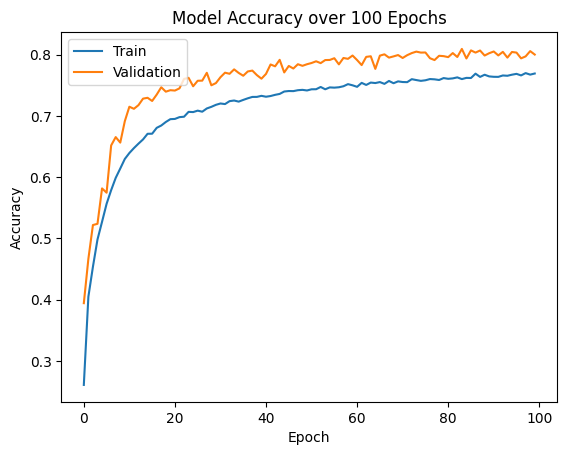

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt  # Import for plotting

# Verify TensorFlow installation and GPU availability
print("TensorFlow version:", tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))

if gpus:
    try:
        # Enable memory growth for each GPU to prevent TensorFlow from allocating all GPU memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print("Error setting memory growth:", e)
else:
    print("No GPU detected. Using CPU.")

# 1. Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# 2. Normalize the input data to [0, 1] range
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. Split the full training set into training and validation sets
val_ratio = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=val_ratio, random_state=42, shuffle=True
)

# 4. Define class names for reference (optional)
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# 5. Print dataset shapes for verification
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

# 6. Set input shape based on CIFAR-10 images
img_rows, img_cols, img_channels = 32, 32, 3
input_shape = (img_rows, img_cols, img_channels)

# 7. Flatten label arrays
y_train = y_train.flatten()
y_valid = y_valid.flatten()
y_test = y_test.flatten()

# 8. Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10  # There are 10 classes in CIFAR-10

y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

kernel_initializer = 'he_normal'

# 9. Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_initializer=kernel_initializer),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.25),


    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu', kernel_initializer=kernel_initializer),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 10. Compile the model
model.compile(
    loss='categorical_crossentropy',      # Suitable loss function for multi-class classification
    optimizer='adam',                     # Adam optimizer
    metrics=['accuracy']                  # Evaluate performance using accuracy
)

# 11. Train the model and capture the history
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=100,
    verbose=1,
    validation_data=(X_valid, y_valid)    # Use validation set for monitoring
)

# 12. Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 13. Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over 100 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Deeper network

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Verify TensorFlow installation and GPU availability
print("TensorFlow version:", tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))

if gpus:
    try:
        # Enable memory growth for each GPU to prevent TensorFlow from allocating all GPU memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print("Error setting memory growth:", e)
else:
    print("No GPU detected. Using CPU.")

# 1. Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# 2. Normalize the input data to [0, 1] range
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. Split the full training set into training and validation sets
val_ratio = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=val_ratio, random_state=42, shuffle=True
)

# 4. Define class names for reference (optional)
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# 5. Print dataset shapes for verification
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

# 6. Set input shape based on CIFAR-10 images
img_rows, img_cols, img_channels = 32, 32, 3
input_shape = (img_rows, img_cols, img_channels)

# 7. Flatten label arrays
y_train = y_train.flatten()
y_valid = y_valid.flatten()
y_test = y_test.flatten()

# 8. Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10  # There are 10 classes in CIFAR-10

y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

kernel_initializer = 'he_normal'

# 9. Define the CNN model
def build_model(num_blocks):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_initializer=kernel_initializer))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    for i in range(1, num_blocks):
        filters = 32 * (2 ** i)
        model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer))
        model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',    
        optimizer='adam',                     
        metrics=['accuracy']                 
    )
    return model

validation_accuracies = []

for num_blocks in range(1, 5):
    print(f"Training model with {num_blocks} block(s)...")
    model = build_model(num_blocks)
    model.fit(
        X_train, y_train,
        batch_size=128,
        epochs=10,
        verbose=0,
        validation_data=(X_valid, y_valid)
    )
    score = model.evaluate(X_valid, y_valid, verbose=0)
    validation_accuracies.append(score[1])
    print(f"Validation accuracy with {num_blocks} block(s): {score[1]:.4f}")

# Print the validation accuracies for each number of blocks
for num_blocks, val_acc in enumerate(validation_accuracies, start=1):
    print(f"Validation accuracy with {num_blocks} block(s): {val_acc:.4f}")



TensorFlow version: 2.18.0
Num GPUs Available: 1
1 Physical GPUs, 1 Logical GPUs
X_train shape: (45000, 32, 32, 3)
45000 train samples
5000 validation samples
10000 test samples
Training model with 1 block(s)...
Validation accuracy with 1 block(s): 0.7114
Training model with 2 block(s)...
Validation accuracy with 2 block(s): 0.7740
Training model with 3 block(s)...
Validation accuracy with 3 block(s): 0.7866
Training model with 4 block(s)...
Validation accuracy with 4 block(s): 0.7764
Validation accuracy with 1 block(s): 0.7114
Validation accuracy with 2 block(s): 0.7740
Validation accuracy with 3 block(s): 0.7866
Validation accuracy with 4 block(s): 0.7764


# Task 2 substask 1 b - Regression CNN for Tell the Time

In [ ]:
""" 
    Download the input data 
"""

import requests
import zipfile
import numpy as np


url = "https://surfdrive.surf.nl/files/index.php/s/GsH5DxUdBgDR64B/download"
file_name = "data_file.zip"

# Download the file
response = requests.get(url)
with open(file_name, 'wb') as file:
    file.write(response.content)

print(f"Downloaded {file_name}")

# Extract the ZIP file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall("data")


"""
# Define the directory containing the images
image_path = "data/images.npy"


images = np.load(data_dir + "/images.npy")

print(images.shape)
"""


Downloaded data_file.zip


'\nimages = np.load(data_dir + "/images.npy")\n\nprint(images.shape)\n'

## Baseline model - MSE loss function



In [71]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

def load_and_split_data(images_path, labels_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_state=42):
    images = np.load(images_path)
    labels = np.load(labels_path) 

    # Normalize the images to [0,1]
    images = images.astype('float32') / 255.0 
    

    num_samples, height, width = images.shape

    # Shuffle + separate into training, validation, test
    X_train, X_temp, y_train, y_temp = train_test_split(
        images, labels, 
        test_size= (1 - train_ratio), 
        random_state=random_state, 
        shuffle=True
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size= val_ratio / (test_ratio + val_ratio), 
        random_state=random_state, 
        shuffle=True
    )   
    
    return [X_train, y_train, X_val, y_val, X_test, y_test]

def label_transformation(labels):

    hours = labels[:, 0].astype(float)
    minutes = labels[:, 1].astype(float)

    # Convert time to continuous value: hour + minutes/60
    continuous_labels = hours + minutes / 60.0
    return continuous_labels

def time_loss_function(y_true, y_pred):
    if np.abs(y_true - y_pred) > 6:
        if y_true > 6:
            y_true = y_true - 12
        else:
            y_true = y_true + 12

    return np.abs(y_true - y_pred)

if __name__ == "__main__":
    images_path = "data/images.npy"
    labels_path = 'labels.npy'
    
    X_train, y_train, X_val, y_val, X_test, y_test = load_and_split_data(images_path=images_path, labels_path=labels_path)

    # Transform the labels to continuous values
    y_test_cont = label_transformation(y_test)
    y_train_cont = label_transformation(y_train)
    y_val_cont = label_transformation(y_val)


    width, height = X_train.shape[1], X_train.shape[2]
    input_shape = (width, height, 1)

    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),  
        Dense(1)  
    ])
        

    model.compile(
        loss='mean_squared_error',  
        optimizer='adam',                    
        metrics=['mae']  # Mean Absolute Error 
    )

    model.fit(
        X_train, y_train_cont,
        batch_size=128,
        epochs=10,
        verbose=1,
        validation_data=(X_val, y_val_cont)   
    )

    # Evaluate the model
    score = model.evaluate(X_test, y_test_cont, verbose=0)
    print('Test loss (MAE):', score[0])
    print('Test Mean Absolute Error (MAE):', score[1])


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 23.8270 - mae: 3.8496 - val_loss: 11.9852 - val_mae: 2.9837
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 12.8688 - mae: 3.0758 - val_loss: 11.8538 - val_mae: 2.9682
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 12.6744 - mae: 3.0530 - val_loss: 12.0023 - val_mae: 2.9759
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 12.6607 - mae: 3.0487 - val_loss: 11.8961 - val_mae: 2.9640
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 12.5072 - mae: 3.0295 - val_loss: 11.3340 - val_mae: 2.8746
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 12.1019 - mae: 2.9540 - val_loss: 11.3021 - val_mae: 2.8199
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 11.5593 - mae: 2.8492 - val_loss: 10.3293 - val_mae: 2.6865
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 10.7481 - mae: 2.7134 - val_loss: 10.1919 - val_mae: 2.6087
Epoch 9/10
113/113 ━━━━━━━━━━━━━

## Right loss function - baseline

Notes:
it doesnt get better with more epochs


In [8]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Lambda


def load_and_split_data(images_path, labels_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_state=42):
    images = np.load(images_path)
    labels = np.load(labels_path) 

    # Normalize the images to [0,1]
    images = images.astype('float32') / 255.0 
    

    num_samples, height, width = images.shape

    # Shuffle + separate into training, validation, test
    X_train, X_temp, y_train, y_temp = train_test_split(
        images, labels, 
        test_size= (1 - train_ratio), 
        random_state=random_state, 
        shuffle=True
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size= val_ratio / (test_ratio + val_ratio), 
        random_state=random_state, 
        shuffle=True
    )   
    
    return [X_train, y_train, X_val, y_val, X_test, y_test]

def label_transformation(labels):

    hours = labels[:, 0].astype(float)
    minutes = labels[:, 1].astype(float)

    # Convert time to continuous value: hour + minutes/60
    continuous_labels = hours + minutes / 60.0
    return continuous_labels

def square_time_loss_function(y_true, y_pred):
    diff = tf.abs(y_true - y_pred)
    circular_diff = tf.minimum(diff, 12 - diff)
    return tf.square(circular_diff)

def absolute_time_loss_function(y_true, y_pred):
    diff = tf.abs(y_true - y_pred)
    circular_diff = tf.minimum(diff, 12 - diff)
    return circular_diff

if __name__ == "__main__":
    images_path = "data/images.npy"
    labels_path = 'labels.npy'
    
    X_train, y_train, X_val, y_val, X_test, y_test = load_and_split_data(images_path=images_path, labels_path=labels_path)


    # Transform the labels to continuous values
    y_test_cont = label_transformation(y_test)
    y_train_cont = label_transformation(y_train)
    y_val_cont = label_transformation(y_val)



    width, height = X_train.shape[1], X_train.shape[2]
    input_shape = (width, height, 1)

    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),  
        Dense(1)  # Output layer for regression, single continuous output
    ]) 

    #   Dense(1, activation='sigmoid'),  # Output layer for regression, single continuous output
    #   Lambda(lambda x: x * 12)  #  make it be between 0 and 12



    model.compile(
        loss= square_time_loss_function,  
        optimizer='adam',                    
        metrics=[absolute_time_loss_function]  # Mean Absolute Error as an additional metric
    )

    model.fit(
        X_train, y_train_cont,
        batch_size=128,
        epochs=10,
        verbose=1,
        validation_data=(X_val, y_val_cont)   
    )

    # Evaluate the model
    score = model.evaluate(X_test, y_test_cont, verbose=0)
    print('Test loss:', score[0])
    print('Test mean minute error', score[1]*60)
    print('Test mean minute error', score[1])


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - absolute_time_loss_function: 2.8061 - loss: 12.1232 - val_absolute_time_loss_function: 3.0381 - val_loss: 12.1927
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - absolute_time_loss_function: 2.9839 - loss: 11.9207 - val_absolute_time_loss_function: 3.0380 - val_loss: 12.1917
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - absolute_time_loss_function: 2.9926 - loss: 12.0409 - val_absolute_time_loss_function: 2.8954 - val_loss: 12.1254
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - absolute_time_loss_function: 2.8443 - loss: 11.8461 - val_absolute_time_loss_function: 2.9916 - val_loss: 12.3004
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - absolute_time_loss_function: 2.8761 - loss: 11.9624 - val_absolute_time_loss_function: 3.0385 - val_loss: 12.2065
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - absolute_time_loss_function: 2.9565 - loss: 12.0377 - val_absolute_time_loss_function: 2.6222 - val_

## Correct loss function with modifications

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - absolute_time_loss_function: 2.5574 - loss: 11.9809 - val_absolute_time_loss_function: 3.0383 - val_loss: 12.2055
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - absolute_time_loss_function: 2.9758 - loss: 11.9417 - val_absolute_time_loss_function: 3.0386 - val_loss: 12.2043
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - absolute_time_loss_function: 3.0014 - loss: 12.0641 - val_absolute_time_loss_function: 3.0387 - val_loss: 12.1979
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - absolute_time_loss_function: 2.9930 - loss: 11.9809 - val_absolute_time_loss_function: 3.0379 - val_loss: 12.1301
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - absolute_time_loss_function: 2.7825 - loss: 10.9146 - val_absolute_time_loss_function: 2.1227 - val_loss: 8.5043
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - absolute_time_loss_function: 2.2852 - loss: 8.2397 - val_absolute_time_loss_function: 1.8415 - val_lo

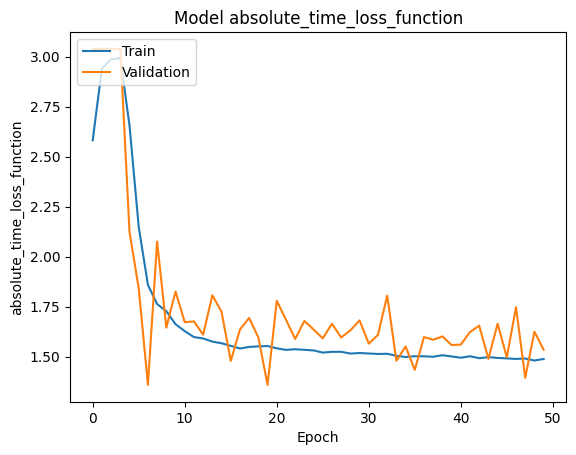

In [23]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Lambda


def load_and_split_data(images_path, labels_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_state=42):
    images = np.load(images_path)
    labels = np.load(labels_path) 

    # Normalize the images to [0,1]
    images = images.astype('float32') / 255.0 
    

    num_samples, height, width = images.shape

    # Shuffle + separate into training, validation, test
    X_train, X_temp, y_train, y_temp = train_test_split(
        images, labels, 
        test_size= (1 - train_ratio), 
        random_state=random_state, 
        shuffle=True
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size= val_ratio / (test_ratio + val_ratio), 
        random_state=random_state, 
        shuffle=True
    )   
    
    return [X_train, y_train, X_val, y_val, X_test, y_test]

def label_transformation(labels):

    hours = labels[:, 0].astype(float)
    minutes = labels[:, 1].astype(float)

    # Convert time to continuous value: hour + minutes/60
    continuous_labels = hours + minutes / 60.0
    return continuous_labels

def square_time_loss_function(y_true, y_pred):
    diff = tf.abs(y_true - y_pred)
    circular_diff = tf.minimum(diff, 12 - diff)
    return tf.square(circular_diff)

def absolute_time_loss_function(y_true, y_pred):
    diff = tf.abs(y_true - y_pred)
    circular_diff = tf.minimum(diff, 12 - diff)
    return circular_diff

if __name__ == "__main__":
    images_path = "data/images.npy"
    labels_path = 'labels.npy'
    
    X_train, y_train, X_val, y_val, X_test, y_test = load_and_split_data(images_path=images_path, labels_path=labels_path)


    # Transform the labels to continuous values
    y_test_cont = label_transformation(y_test)
    y_train_cont = label_transformation(y_train)
    y_val_cont = label_transformation(y_val)


    width, height = X_train.shape[1], X_train.shape[2]
    input_shape = (width, height, 1)

    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),  
        Dense(1)  
    ]) 


    model.compile(
        loss= square_time_loss_function,  
        optimizer='adam',                    
        metrics=[absolute_time_loss_function]  # Mean Absolute Error as an additional metric
    )

    
   # Train the model and capture the history
    history = model.fit(
        X_train, y_train_cont,
        batch_size=128,
        epochs=50,
        verbose=1,
        validation_data=(X_val, y_val_cont)
    )

    # Evaluate the model
    score = model.evaluate(X_test, y_test_cont, verbose=0)
    print('Test loss:', score[0])
    print('Test mean minute error:', score[1] * 60)  
    print('Test mean hour error:', score[1])  


    # Plot training & validation absolute_time_loss_function values
    plt.figure()
    plt.plot(history.history['absolute_time_loss_function'], label='Train')
    plt.plot(history.history['val_absolute_time_loss_function'], label='Validation')
    plt.title('Model absolute_time_loss_function')
    plt.ylabel('absolute_time_loss_function')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

## 100 epochs plot val_accuracy

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - absolute_time_loss_function: 2.6820 - loss: 12.1434 - val_absolute_time_loss_function: 3.0375 - val_loss: 12.1875
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - absolute_time_loss_function: 3.0005 - loss: 11.9829 - val_absolute_time_loss_function: 3.0374 - val_loss: 12.1865
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - absolute_time_loss_function: 2.9984 - loss: 11.9658 - val_absolute_time_loss_function: 3.0376 - val_loss: 12.1882
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - absolute_time_loss_function: 2.9956 - loss: 11.9323 - val_absolute_time_loss_function: 3.0379 - val_loss: 12.1906
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - absolute_time_loss_function: 3.0006 - loss: 12.0146 - val_absolute_time_loss_function: 3.0380 - val_loss: 12.1923
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - absolute_time_loss_function: 2.9955 - loss: 11.9679 - val_absolute_time_loss_function: 3.0384 

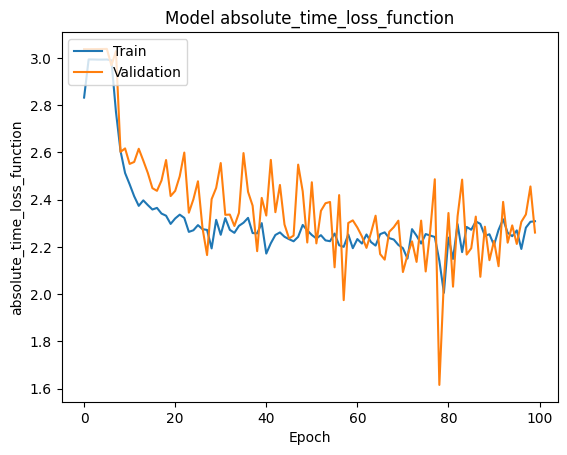

In [26]:


import numpy as np 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Lambda


def load_and_split_data(images_path, labels_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_state=42):
    images = np.load(images_path)
    labels = np.load(labels_path) 

    # Normalize the images to [0,1]
    images = images.astype('float32') / 255.0 
    

    num_samples, height, width = images.shape

    # Shuffle + separate into training, validation, test
    X_train, X_temp, y_train, y_temp = train_test_split(
        images, labels, 
        test_size= (1 - train_ratio), 
        random_state=random_state, 
        shuffle=True
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size= val_ratio / (test_ratio + val_ratio), 
        random_state=random_state, 
        shuffle=True
    )   
    
    return [X_train, y_train, X_val, y_val, X_test, y_test]

def label_transformation(labels):

    hours = labels[:, 0].astype(float)
    minutes = labels[:, 1].astype(float)

    # Convert time to continuous value: hour + minutes/60
    continuous_labels = hours + minutes / 60.0
    return continuous_labels

def square_time_loss_function(y_true, y_pred):
    diff = tf.abs(y_true - y_pred)
    circular_diff = tf.minimum(diff, 12 - diff)
    return tf.square(circular_diff)

def absolute_time_loss_function(y_true, y_pred):
    diff = tf.abs(y_true - y_pred)
    circular_diff = tf.minimum(diff, 12 - diff)
    return circular_diff

if __name__ == "__main__":
    images_path = "data/images.npy"
    labels_path = 'labels.npy'
    
    X_train, y_train, X_val, y_val, X_test, y_test = load_and_split_data(images_path=images_path, labels_path=labels_path)


    # Transform the labels to continuous values
    y_test_cont = label_transformation(y_test)
    y_train_cont = label_transformation(y_train)
    y_val_cont = label_transformation(y_val)


    width, height = X_train.shape[1], X_train.shape[2]
    input_shape = (width, height, 1)

    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  

        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25), 

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),  
        Dense(1)  
    ]) 


    model.compile(
        loss= square_time_loss_function,  
        optimizer='adam',                    
        metrics=[absolute_time_loss_function]  # Mean Absolute Error as an additional metric
    )

     
   # Train the model and capture the history
    history = model.fit(
        X_train, y_train_cont,
        batch_size=128,
        epochs=100,
        verbose=1,
        validation_data=(X_val, y_val_cont)
    )

    # Evaluate the model
    score = model.evaluate(X_test, y_test_cont, verbose=0)
    print('Test loss:', score[0])
    print('Test mean minute error:', score[1] * 60)  
    print('Test mean hour error:', score[1])  


    # Plot training & validation absolute_time_loss_function values
    plt.figure()
    plt.plot(history.history['absolute_time_loss_function'], label='Train')
    plt.plot(history.history['val_absolute_time_loss_function'], label='Validation')
    plt.title('Model absolute_time_loss_function')
    plt.ylabel('absolute_time_loss_function')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()


## double head attempt

In [4]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Lambda


def load_and_split_data(images_path, labels_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_state=42):
    images = np.load(images_path)
    labels = np.load(labels_path) 

    # Normalize the images to [0,1]
    images = images.astype('float32') / 255.0 
    

    num_samples, height, width = images.shape

    # Shuffle + separate into training, validation, test
    X_train, X_temp, y_train, y_temp = train_test_split(
        images, labels, 
        test_size= (1 - train_ratio), 
        random_state=random_state, 
        shuffle=True
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size= val_ratio / (test_ratio + val_ratio), 
        random_state=random_state, 
        shuffle=True
    )   
    
    return [X_train, y_train, X_val, y_val, X_test, y_test]

def label_transformation(labels):

    hours = labels[:, 0].astype(float)
    minutes = labels[:, 1].astype(float)

    return hours, minutes

def square_time_loss_function(y_true, y_pred):
    diff1 = tf.abs(y_true[0] - y_pred[0])
    diff2 = tf.abs(y_true[1] - y_pred[1])

    circular_diff1 = tf.minimum(diff1, 12 - diff1)
    circular_diff2 = tf.minimum(diff2, 60 - diff2)

    norm1 = tf.square(circular_diff1)/144
    norm2 = tf.square(circular_diff2)/3600

    return 10*(norm1 + norm2)

def absolute_time_loss_function(y_true, y_pred):
    diff1 = tf.abs(y_true[0] - y_pred[0])
    diff2 = tf.abs(y_true[1] - y_pred[1])

    circular_diff1 = tf.minimum(diff1, 12 - diff1)
    circular_diff2 = tf.minimum(diff2, 60 - diff2)

    return [circular_diff1,circular_diff2]

if __name__ == "__main__":
    images_path = "data/images.npy"
    labels_path = 'labels.npy'
    
    X_train, y_train, X_val, y_val, X_test, y_test = load_and_split_data(images_path=images_path, labels_path=labels_path)


    # Transform the labels to continuous values
    y_test_heads = label_transformation(y_test)
    y_train_heads = label_transformation(y_train)
    y_val_heads = label_transformation(y_val)



    width, height = X_train.shape[1], X_train.shape[2]
    input_shape = (width, height, 1)

    model = Sequential([
        Conv2D(75, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

        Conv2D(150, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.25),  
        Dense(2)  
    ]) 

    model.compile(
        loss= square_time_loss_function,  
        optimizer='adam',                    
        metrics=[absolute_time_loss_function]  # Mean Absolute Error as an additional metric
    )

    model.fit(
        X_train, y_train_heads,
        batch_size=64,
        epochs=10,
        verbose=1,
        validation_data=(X_val, y_val_heads)   
    )

    # Evaluate the model
    score = model.evaluate(X_test, y_test_cont, verbose=0)
    print('Test loss:', score[0])
    print('Test mean hour error', score[1])
    print('Test mean minute error', score[2])


/vol/home/s4422090/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1730746927.125608 2854425 service.cc:148] XLA service 0x7feb6801cfc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730746927.125635 2854425 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-04 20:02:07.140979: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730746927.206244 2854425 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-04 20:02:07.275104: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


  1/225 ━━━━━━━━━━━━━━━━━━━━ 20:41 6s/step - absolute_time_loss_function: 3.4721 - loss: 1.7344

I0000 00:00:1730746931.996795 2854425 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - absolute_time_loss_function: 3.7275 - loss: 0.9302

2024-11-04 20:02:25.934772: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.00GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - absolute_time_loss_function: 3.7256 - loss: 0.9301 - val_absolute_time_loss_function: 3.1929 - val_loss: 0.6398
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - absolute_time_loss_function: 4.1560 - loss: 0.9610 - val_absolute_time_loss_function: 3.0249 - val_loss: 0.6977
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - absolute_time_loss_function: 3.6622 - loss: 0.8855 - val_absolute_time_loss_function: 3.2642 - val_loss: 0.6361
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - absolute_time_loss_function: 4.0698 - loss: 0.9030 - val_absolute_time_loss_function: 3.1119 - val_loss: 0.6475
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - absolute_time_loss_function: 3.9789 - loss: 1.0179 - val_absolute_time_loss_function: 3.0405 - val_loss: 0.6753
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - absolute_time_loss_function: 3.5161 - loss: 0.8398 - val_absolute_time_loss_function: 3.0495 - val_loss: 0.6996
Epo

NameError: name 'y_test_cont' is not defined

## full solution gpt

In [ ]:
import numpy as np  
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, add, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import
import tensorflow as tf

def load_and_split_data(images_path, labels_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_state=42):
    images = np.load(images_path)
    labels = np.load(labels_path) 

    # Normalize the images to [0,1]
    images = images.astype('float32') / 255.0 

    num_samples, height, width = images.shape

    # Expand dimensions to include channel dimension
    images = np.expand_dims(images, axis=-1)

    # Shuffle + separate into training, validation, test
    X_train, X_temp, y_train, y_temp = train_test_split(
        images, labels, 
        test_size= (1 - train_ratio), 
        random_state=random_state, 
        shuffle=True
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size= test_ratio / (test_ratio + val_ratio), 
        random_state=random_state, 
        shuffle=True
    )   
    
    return [X_train, y_train, X_val, y_val, X_test, y_test]

def label_transformation(labels):
    # Convert hours and minutes to angles in radians
    hours = labels[:, 0] % 12  # Ensure hours are in 0-11
    minutes = labels[:, 1]
    
    hour_angles = (hours + minutes / 60.0) * (2 * np.pi / 12.0)  # Convert time to angle in radians
    hour_sin = np.sin(hour_angles)
    hour_cos = np.cos(hour_angles)
    
    # For minutes, we keep them as integers (0-59) for classification
    minute_labels = labels[:, 1].astype(int)
    
    return hour_sin, hour_cos, minute_labels

def residual_block(x, filters, kernel_size=(3,3), stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    
    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, kernel_size=(1,1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x

def cosine_loss(y_true, y_pred):
    # Compute cosine loss between true and predicted vectors
    y_true = tf.math.l2_normalize(y_true, axis=-1)
    y_pred = tf.math.l2_normalize(y_pred, axis=-1)
    loss = 1 - tf.reduce_sum(y_true * y_pred, axis=-1)
    return loss

if __name__ == "__main__":
    images_path = "data/images.npy"
    labels_path = 'labels.npy'
    
    X_train, y_train, X_val, y_val, X_test, y_test = load_and_split_data(images_path=images_path, labels_path=labels_path)
    
    # Transform the labels
    y_train_hour_sin, y_train_hour_cos, y_train_minute = label_transformation(y_train)
    y_val_hour_sin, y_val_hour_cos, y_val_minute = label_transformation(y_val)
    y_test_hour_sin, y_test_hour_cos, y_test_minute = label_transformation(y_test)
    
    # Combine hour sin and cos into one array for regression output
    y_train_hour = np.stack((y_train_hour_sin, y_train_hour_cos), axis=-1)
    y_val_hour = np.stack((y_val_hour_sin, y_val_hour_cos), axis=-1)
    y_test_hour = np.stack((y_test_hour_sin, y_test_hour_cos), axis=-1)
    
    # Data augmentation with only rotations and shifts
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2
    )
    
    datagen.fit(X_train)
    
    # Build the model
    width, height = X_train.shape[1], X_train.shape[2]
    input_shape = (width, height, 1)
    
    inputs = Input(shape=input_shape)
    
    x = Conv2D(32, kernel_size=(3,3), strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = residual_block(x, filters=32)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x = residual_block(x, filters=64)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x = residual_block(x, filters=128)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x = Dropout(0.25)(x)
    
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    
    # Hour head (regression)
    hour_output = Dense(2, activation='linear', name='hour_output')(x)  # Predicting sin and cos of hour angle
    
    # Minute head (classification)
    minute_output = Dense(60, activation='softmax', name='minute_output')(x)
    
    model = Model(inputs=inputs, outputs=[hour_output, minute_output])
    
    model.compile(
        optimizer='adam',
        loss={'hour_output': cosine_loss, 'minute_output': 'sparse_categorical_crossentropy'},
        metrics={'hour_output': 'mae', 'minute_output': 'accuracy'}
    )
    
    batch_size = 128
    
    train_generator = datagen.flow(
        X_train, {'hour_output': y_train_hour, 'minute_output': y_train_minute},
        batch_size=batch_size
    )
    
    steps_per_epoch = len(X_train) // batch_size
    
    model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=10,
        validation_data=(X_val, {'hour_output': y_val_hour, 'minute_output': y_val_minute})
    )
    
    # Evaluate the model
    test_metrics = model.evaluate(X_test, {'hour_output': y_test_hour, 'minute_output': y_test_minute}, verbose=0)
    print('Test loss:', test_metrics[0])
    print('Test minutes MAE:', test_metrics[3]*60+test_metrics[4])



Epoch 1/10


/vol/home/s4422090/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - hour_output_loss: 0.9988 - hour_output_mae: 1.9817 - loss: 6.6406 - minute_output_accuracy: 0.0172 - minute_output_loss: 5.6405 - val_hour_output_loss: 1.0098 - val_hour_output_mae: 0.6371 - val_loss: 5.1032 - val_minute_output_accuracy: 0.0194 - val_minute_output_loss: 4.0947
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - hour_output_loss: 1.0023 - hour_output_mae: 0.6376 - loss: 5.0966 - minute_output_accuracy: 0.0162 - minute_output_loss: 4.0944 - val_hour_output_loss: 1.0193 - val_hour_output_mae: 0.6373 - val_loss: 5.1152 - val_minute_output_accuracy: 0.0128 - val_minute_output_loss: 4.0951
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - hour_output_loss: 0.9869 - hour_output_mae: 0.6364 - loss: 5.0832 - minute_output_accuracy: 0.0198 - minute_output_loss: 4.0943 - val_hour_output_loss: 1.0194 - val_hour_output_mae: 0.6373 - val_loss: 5.1157 - val_minute_output_accuracy: 0.0128 - val_minute_output_loss: 4.0955
Epoch 4/10

In [12]:
print('Test minutes MAE:', test_metrics[3]*60+test_metrics[4])


Test minutes MAE: 38.14684348274022
